<a href="https://colab.research.google.com/github/drusho/data_analysis/blob/main/Reddit_Politics_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Data Analysis of /r/Politics Subreddit__
#### _Data Analaysis, NLP, Visualizations_

##### Python Extensions Used: 
* _Pandas_: organized data and create dataframes
* _Plotly_: create interactive charts/visualizations
* _Praw_: scrape reddit subs
* _Texthero_: provide semantic analysis of post titles 

### Goals of Project
The purpose of this project was to practice using APIs to scrape data from the web.  For this project Reddit's subreddit 'politics' was used since it has a large amount of participation and userbase.  Some additional goals for the project included: 
- Finding the top posts by score
- Deos a high score correlate with a high number of comments
- Popular words that are useed in titles
- Semantics analysis of posts and determine if they are negative, positive, or neutral? 

In [ ]:
pip install praw

In [ ]:
pip install vaderSentiment

In [ ]:
pip install texthero

In [121]:
from configparser import ConfigParser 
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import praw
import texthero as herofrom 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [64]:
# cid = 't4MWafN7valKRA'
# csec = '_nmp3CGP9gSviRzk7r8L0rU2uFLXLA'
# ua = 'testing-scrape'
# username = 'googlenoob'
# password = 'btV~pzj9HYga$N'

In [83]:
#Read config.ini file
config_object = ConfigParser()
config_object.read("config.ini")

# Reddit/PRAW credentials from config file
login = config_object['USERINFO']

In [85]:
reddit = praw.Reddit(client_id=login['cid'], 
                     client_secret=login['csec'], 
                     user_agent=login['ua'],
                     check_for_async=False)

In [110]:
# list for df conversion
posts = [] 

# select a subreddit to scrape
sub = 'politics' 

# return 500 new posts
new_bets = reddit.subreddit(sub).hot(limit=500) 

# return selected reddit post attributes
for post in new_bets:
    posts.append([post.title, 
                  post.selftext, 
                  post.score, 
                  post.upvote_ratio,
                  post.num_comments, 
                  post.created_utc,
                  post.is_original_content,
                  post.url]) 

# create df, rename columns, and make dtype for all data a str
posts = pd.DataFrame(posts,
                     columns=['title', 
                              'post', 
                              'score', 
                              'upvote_ratio',
                              'comments', 
                              'created',
                              'original_content',
                              'url'],
                     dtype='str')

posts.sample(3)

,title,post,score,upvote_ratio,comments,created,original_content,url
306,People fleeing New York and New Jersey for the...,,110,0.93,28,1618653755.0,False,https://www.inquirer.com/politics/pennsylvania...
273,"60 years after the Bay of Pigs invasion, many ...",,138,0.86,46,1618669266.0,False,https://www.cnn.com/2021/04/17/politics/bay-of...
276,Alleged sex trafficking victim may be cooperat...,,923,0.98,55,1618629552.0,False,https://thehill.com/homenews/house/548800-alle...


# __Column Descriptions__ 


| Heading | Description  |
|:---     |:---          |
|title        |_The title of the submission._|
|post         |_The submissions’ selftext - an empty string if a link post._|
|score        |_The number of upvotes for the submission._|
|upvote_ratio |_The percentage of upvotes from all votes on the submission._|
|comments     |_The number of comments on the submission._|
|created      |_Time the submission was created, represented in Unix Time._|
|original_content|_Whether or not the submission has been set as original content._|
|url          |_The URL the submission links to, or the permalink if a selfpost._|

In [111]:
# created timestamp column to represent correct created column data
posts['created'] = pd.to_datetime(posts['created'], unit='s')
posts['created'].head(3)

0   2021-04-13 15:09:23
1   2021-04-18 20:37:47
2   2021-04-18 21:40:39
Name: created, dtype: datetime64[ns]

In [112]:
# change dytpe of score and comments cols to int
posts[['comments','score']] = posts[['comments','score']].astype('int')
posts['upvote_ratio'] = posts['upvote_ratio'].astype('float')

In [113]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             500 non-null    object        
 1   post              500 non-null    object        
 2   score             500 non-null    int64         
 3   upvote_ratio      500 non-null    float64       
 4   comments          500 non-null    int64         
 5   created           500 non-null    datetime64[ns]
 6   original_content  500 non-null    object        
 7   url               500 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 31.4+ KB


In [114]:
# Clean post titles
posts['clean_title'] = herofrom.clean(posts['title'])
posts['clean_title'].sample(10)

477      gop donors hobnobbing person dems sticking zoom
221            observer view joe biden' sanctions russia
227    treatment ban creates uncertainty trans youth ...
264    'comically evil' marjorie taylor greene lauren...
123    criticism biden says raise u cap refugee admis...
388    feds rescind health care funding agreement wou...
82             indianapolis shooting red flag never flew
405    chicago mayor slams trash rumors indicates res...
172    ted cruz among small number republicans opposi...
2      bush calls congress tone harsh rhetoric immigr...
Name: clean_title, dtype: object

In [115]:
# shorten post titles
posts['short_clean_title'] = posts.clean_title.str[:100]+ '...'

In [116]:
# Top 10 Popular posts based on score
top_posts = posts.groupby(['title'])['score','upvote_ratio'].sum().sort_values(by='score',ascending=False).reset_index()
top_posts[['score','upvote_ratio','title']].head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,score,upvote_ratio,title
0,63001,0.87,Mitch McConnell blocked the Ruth Bader Ginsbur...
1,57647,0.77,There was Trump-Russia collusion — and Trump p...
2,55677,0.91,Americans overwhelmingly say marijuana should ...
3,53364,0.89,'Completely Unreasonable': Dems Slam GOP Deman...
4,48970,0.90,GOP Rep. Adam Kinzinger calls on party to expe...
5,47043,0.79,John Kerry apologises for Donald Trump’s ‘rene...
6,45462,0.91,‘It’s long overdue’: Rep. Young breaks with GO...
7,39308,0.85,GOP Rep. Lauren Boebert Blasted For Absurd Twe...
8,35346,0.91,Republicans Who Voted to Impeach Trump Are Out...
9,34983,0.84,AOC accuses Chicago prosecutor of ‘lying’ abou...


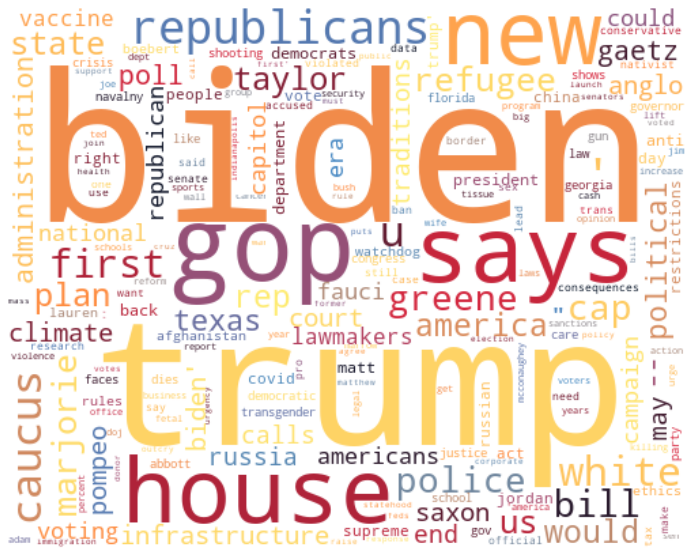

In [117]:
# Word cloud of top words from clean_title
herofrom.wordcloud(posts.clean_title,width = 500, height= 400,background_color='White')

In [118]:
tw = herofrom.visualization.top_words(posts['clean_title']).head(20).to_frame()
tw.reset_index(inplace=True)
tw.rename(columns={'index':'word','clean_title':'freq'},inplace=True)

In [122]:
# Top 25 Words From Post Titles 
fig = go.Figure([go.Bar(x=tw.word, y=tw.freq,textposition='auto')])

fig.update_layout(
    title={
        'text': "Top 25 Words Found in /r/politics Post Titles",
        'y':0.88,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})


fig.show()

In [123]:
# Post Scores vs Comments 

fig = go.Figure(data=go.Scatter(x=posts.comments,
                                y=posts.score,
                                mode='markers',
                                text=posts.title))  # hover text goes here 
                              
fig.update_layout(
    title={
        'text': "/r/politics Posts' Scores vs Comments",
        'y':0.88,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title="Scores",
        yaxis_title="Comments",)

fig.show()

### __Sentiment Analysis of Post Titles__

Scale for determining sentiment

    positive: compound score>=0.05
    neutral: compound score between -0.05 and 0.05
    negative: compound score<=-0.05

In [125]:
# sentences = posts.title
# for i in range(len(sentences)):
#     vs = analyzer.polarity_scores(sentences[i])

analyzer = SentimentIntensityAnalyzer()

posts['neg'] = posts['title'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
posts['neu'] = posts['title'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
posts['pos'] = posts['title'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
posts['compound'] = posts['title'].apply(lambda x:analyzer.polarity_scores(x)['compound'])

posts.sample(3)

,title,post,score,upvote_ratio,comments,created,original_content,url,clean_title,short_clean_title,neg,neu,pos,compound
416,Biden Administration Says Russian Intelligence...,,4289,0.97,113,2021-04-16 01:01:19,False,https://www.nytimes.com/2021/04/15/us/politics...,biden administration says russian intelligence...,biden administration says russian intelligence...,0.0,0.721,0.279,0.4767
438,Discussion Thread: Press Secretary Jen Psaki H...,White House Press Secretary Jen Psaki briefs r...,232,0.95,134,2021-04-16 14:53:33,False,https://www.reddit.com/r/politics/comments/ms4...,discussion thread press secretary jen psaki ho...,discussion thread press secretary jen psaki ho...,0.0,1.000,0.000,0.0000
134,Garland rescinds Trump-era restrictions on fed...,,11243,0.99,188,2021-04-17 14:58:27,False,https://www.latimes.com/politics/story/2021-04...,garland rescinds trump era restrictions federa...,garland rescinds trump era restrictions federa...,0.0,1.000,0.000,0.0000


In [127]:
# Post Scores vs Compound Sentiment Score

fig = go.Figure(data=go.Scatter(x=posts.compound,
                                y=posts.score,
                                mode='markers',
                                text=posts.title))  # hover text goes here 
                              
fig.update_layout(
    title={
        'text': "/r/politics Posts' Scores vs Comments",
        'y':0.88,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title="Compound Sentiment Score",
        yaxis_title="Scores",)

fig.show()

## __Conclusion__ 



## __Project Resources__
###### Helpful resources that were used to complete this project.

* [PRAW: The Python Reddit API Wrapper](https://praw.readthedocs.io)
  
  One of the main resources for project was prawn documentation.

<br>

* [Ultimate Beginners Guide to Collecting Text for Natural Language Processing (NLP) with Python — Twitter, Reddit, Genius and More
Collect Text through APIs and Web Scraping](https://towardsdatascience.com/ultimate-beginners-guide-to-collecting-text-for-natural-language-processing-nlp-with-python-256d113e6184)
<p>

  _by Eric Kleppen_

  This article was a good resource for learning how to use prawn for scraping Reddit.  

<br>

* [How to scrape Reddit with Python](https://www.storybench.org/how-to-scrape-reddit-with-python/) 
<p> 

  _by Felippe Rodrigues_ 

  None of the code from this resource was used, but it was a useful resource for looking at different methods for achieving the same results layed out in Eric Kleppen article.

<br> 

* [Try TextHero: The Absolute Simplest way to Clean and Analyze Text in Pandas](https://towardsdatascience.com/try-texthero-the-absolute-simplest-way-to-clean-and-analyze-text-in-pandas-6db86ed14272)

 _Natural Language Processing (NLP) made easy for Python_ 

 _Posted on July 2020, By: Eric Kleppen_

<br>

* [How to Use Texthero to Prepare a Text-based Dataset for Your NLP Project](https://www.analyticsvidhya.com/blog/2020/08/how-to-use-texthero-to-prepare-a-text-based-dataset-for-your-nlp-project/)

 _Posted on Aug. 2020, By: Davis David_

<br>

* [How to Run Sentiment Analysis in Python using VADER](https://python-bloggers.com/2020/10/how-to-run-sentiment-analysis-in-python-using-vader/)

 _Posted on October 11, 2020 by George Pipis_ 

 This post provided a great explaination of Vader Sentiment Analysis and a descriptive breakdown of neg, pos, neu, and compound categories.

<br>

* [How to read and write configuration (.ini) file in python](https://www.codeforests.com/2020/06/14/how-to-read-ini-file-in-python/)

 Used this post to understand the basics of creating an init file in order to save login information without having to write it into your python code/notebook.  Makes it much easier to share code without have to worry about giving out username/passwords to the world.


#### __Problems/Solutions__
1. 'created' column only showed the year 1970 when attempting to convert to datetime dtype.
 
 Solutions:
 * [Stackoverflow](https://stackoverflow.com/questions/51587468/datetime-defaulting-to-1970-in-pandas)
 * [Datetime defaulting to 1970 in pandas](https://stackoverflow.com/questions/51587468/datetime-defaulting-to-1970-in-pandas)



2. Wordcloud Image from Texthero was blurry for all sizes.

 Solutions: 
 * [My wordcloud looks ugly. Which argument to change to make it look cleaner?](https://github.com/jbesomi/texthero/issues/78)

    * [Update docstring for hero.wordcloud #102](https://github.com/jbesomi/texthero/issues/102)
